In [1]:
import pandas as pd
import numpy as np

from pathlib import Path

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset_csv_path = Path('data/news/20newsgroup_preprocessed.csv')
dataset_csv_path = Path('data/csob/dataset_till_128.csv')

dataset_csv_path.is_file()

True

In [97]:
df = pd.read_csv(dataset_csv_path, delimiter=',', index_col=0)

## EDA

In [98]:
df.head()

,category,subcategory,text,labels,text_encoded,encoded_len
0,"Sporné transakce PK, ATM",Reklamace - ATM služby,"TEST - změna pro toho, kdo označil ""+ Sledujte...",16,"[2, 5473, 17, 7030, 581, 939, 16, 1311, 12566,...",22
1,Poplatky / Úroky,Poplatky za služby,Snacha paní Fialová-disponentka reklamuje popl...,15,"[2, 1347, 1292, 2386, 11702, 665, 17, 26415, 8...",91
2,Bezhotovostní platební styk (TPS),Provedení,"Dne 19/2/2018 bylo zaúčtováno 1000 Kč, který š...",1,"[2, 1417, 990, 19, 22, 19, 2377, 389, 852, 586...",108
3,Výpisy,Nedoručení,206173249 Disponent reklamuje neobdržení výpis...,17,"[2, 1519, 371, 26957, 388, 26896, 375, 26415, ...",46
4,Založení / Změna / Zrušení (produkt / služba),Založení,"Klientka tvrdí, že mám záznam v bankovním regi...",19,"[2, 7434, 603, 3481, 16, 604, 1554, 10017, 64,...",69


In [99]:
len(df)

73407

In [100]:
df.columns

Index(['category', 'subcategory', 'text', 'labels', 'text_encoded',
       'encoded_len'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73407 entries, 0 to 92477
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      73407 non-null  object
 1   subcategory   71980 non-null  object
 2   text          73407 non-null  object
 3   labels        73407 non-null  int64 
 4   text_encoded  73407 non-null  object
 5   encoded_len   73407 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.9+ MB


In [102]:
text_column = 'text'
label_column = 'category'

In [103]:
df = df.drop_duplicates(text_column)
df = df[df[text_column].map(lambda _text: isinstance(_text, str) and len(_text.strip()) > 0)]

In [111]:
list(df[[label_column, 'subcategory']].value_counts().reset_index(level=[0,1]).itertuples())

[Pandas(Index=0, category='Výpisy', subcategory='Nedoručení', _3=8503),
 Pandas(Index=1, category='Sporné transakce PK, ATM', subcategory='Reklamace - sporná trx PK u obchodníků', _3=6201),
 Pandas(Index=2, category='Poplatky / Úroky', subcategory='Poplatky za služby', _3=6022),
 Pandas(Index=3, category='Sporné transakce PK, ATM', subcategory='Reklamace - neautorizovaná trx (zneužití PK)', _3=4804),
 Pandas(Index=4, category='Platební karty', subcategory='Pojištění', _3=3312),
 Pandas(Index=5, category='Sporné transakce PK, ATM', subcategory='Reklamace - vklad ATM', _3=3111),
 Pandas(Index=6, category='Sporné transakce PK, ATM', subcategory='Reklamace - výběr ČSOB ATM', _3=2995),
 Pandas(Index=7, category='Bezhotovostní platební styk (TPS)', subcategory='Provedení', _3=2424),
 Pandas(Index=8, category='Založení / Změna / Zrušení (produkt / služba)', subcategory='Zrušení', _3=2393),
 Pandas(Index=9, category='Data o klientech / Identifikace klienta', subcategory='Evidované informace o 

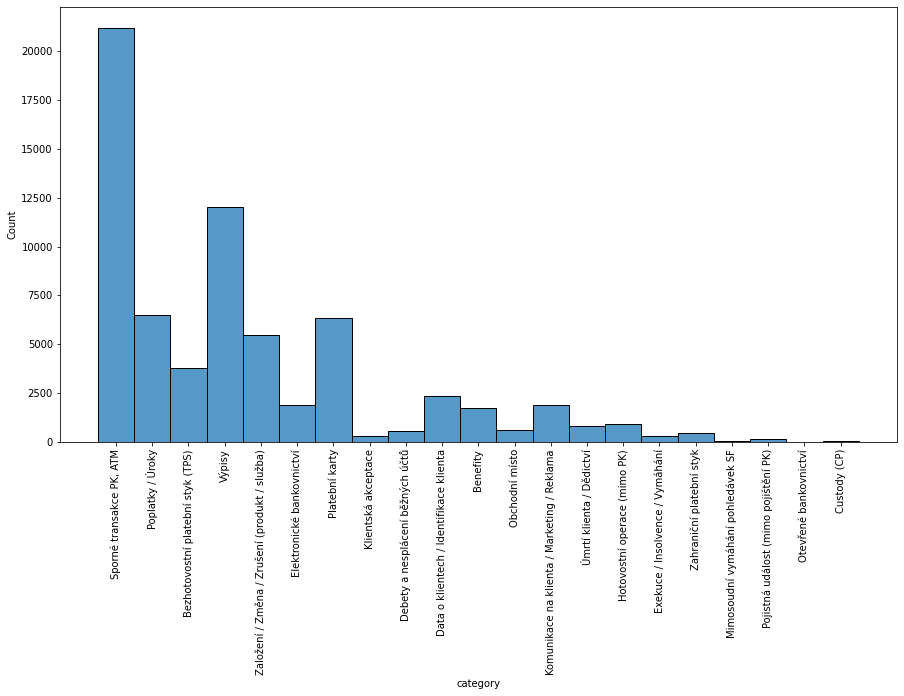

In [72]:
plt.figure(figsize = (15,8))
ax = sns.histplot(df[label_column]);#.value_counts().plot(kind='bar');
plt.xticks(rotation = 90);


In [73]:
selected_categories = [
    'Sporné transakce PK, ATM',
    'Výpisy',
    'Poplatky / Úroky',
    'Založení / Změna / Zrušení (produkt / služba)',
    'Bezhotovostní platební styk (TPS)',
]

In [81]:
sample_df.columns

Index(['category', 'subcategory', 'text', 'labels', 'text_encoded',
       'encoded_len'],
      dtype='object')

In [83]:
df_old = df[df[label_column].map(lambda _label: _label in selected_categories)]
df_change = df[df[label_column].map(lambda _label: _label not in selected_categories)]

df_change[label_column] = ['Others' for _ in range(len(df_change))]

df_old_change = df_old[df_old[label_column] == 'Sporné transakce PK, ATM']
df_old_old = df_old[df_old[label_column] != 'Sporné transakce PK, ATM']

df_old_change[label_column] = df_old_change['subcategory']

new_df = pd.concat([df_old_old, df_old_change, df_change])
sample_df = new_df.sample(len(new_df))

sample_df = sample_df[sample_df[label_column].notna()]
sample_df = sample_df.reset_index(drop=True)
sample_df

/var/folders/v5/tfl8tcs97yb885f785jcdlvc0000gn/T/ipykernel_99278/757716140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_change[label_column] = ['Others' for _ in range(len(df_change))]
/var/folders/v5/tfl8tcs97yb885f785jcdlvc0000gn/T/ipykernel_99278/757716140.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_change[label_column] = df_old_change['subcategory']


,category,subcategory,text,labels,text_encoded,encoded_len
0,Výpisy,Žádost o dotisk,"Klientka žádá o znovu zaslání výpisů, byla sez...",17,"[2, 7434, 603, 12387, 57, 1665, 1688, 2923, 29...",72
1,Reklamace - sporná trx PK u obchodníků,Reklamace - sporná trx PK u obchodníků,"Klient reklamuje transakci 5,99 EUR, která se ...",16,"[2, 7434, 19031, 612, 13900, 605, 25, 16, 1515...",32
2,Založení / Změna / Zrušení (produkt / služba),Založení,Pan Slováček reklamuje opakované zasílání SMS ...,19,"[2, 1351, 7796, 1126, 19031, 612, 26428, 19516...",55
3,Výpisy,Nedoručení,"Klient volal už před cca 14 dny s tím, že chtě...",17,"[2, 7434, 11264, 727, 676, 11249, 2876, 3337, ...",64
4,Others,Nastavení,Dne 14.7.2018 jste si požádal o změnu OÚ na PÚ...,5,"[2, 1417, 2876, 18, 27, 18, 2377, 389, 1281, 6...",56
...,...,...,...,...,...,...
66570,Poplatky / Úroky,Poplatky za služby,Klientovi byl zaúčtován poplatek 300 kč za obn...,15,"[2, 7434, 968, 781, 586, 4243, 8126, 337, 1583...",75
66571,Others,Pojištění,oznámení o škodní události-klient ztratil peně...,13,"[2, 11033, 57, 7823, 556, 6418, 17, 7434, 7867...",44
66572,Založení / Změna / Zrušení (produkt / služba),Založení,5.2.2018 byl na pobočce nastavit Autom. plnou ...,19,"[2, 25, 18, 22, 18, 2377, 389, 781, 563, 7550,...",66
66573,Výpisy,Žádost o dotisk,Prosíme o zaslání duplikátu výpisu z účtu za d...,17,"[2, 4085, 343, 57, 1688, 2923, 1104, 10915, 12...",28


In [96]:
sample_df[label_column].value_counts()

Others                                           18637
Výpisy                                           12030
Poplatky / Úroky                                  6487
Reklamace - sporná trx PK u obchodníků            6201
Založení / Změna / Zrušení (produkt / služba)     5483
Reklamace - neautorizovaná trx (zneužití PK)      4804
Bezhotovostní platební styk (TPS)                 3789
Reklamace - vklad ATM                             3111
Reklamace - výběr ČSOB ATM                        2995
Reklamace - neautorizovaná trx  (zneužití PK)     2036
Reklamace - výběr ATM jiných bank                  741
Reklamace - ATM služby                             223
Reklamace – ATM - 3. strany                         38
Name: category, dtype: int64

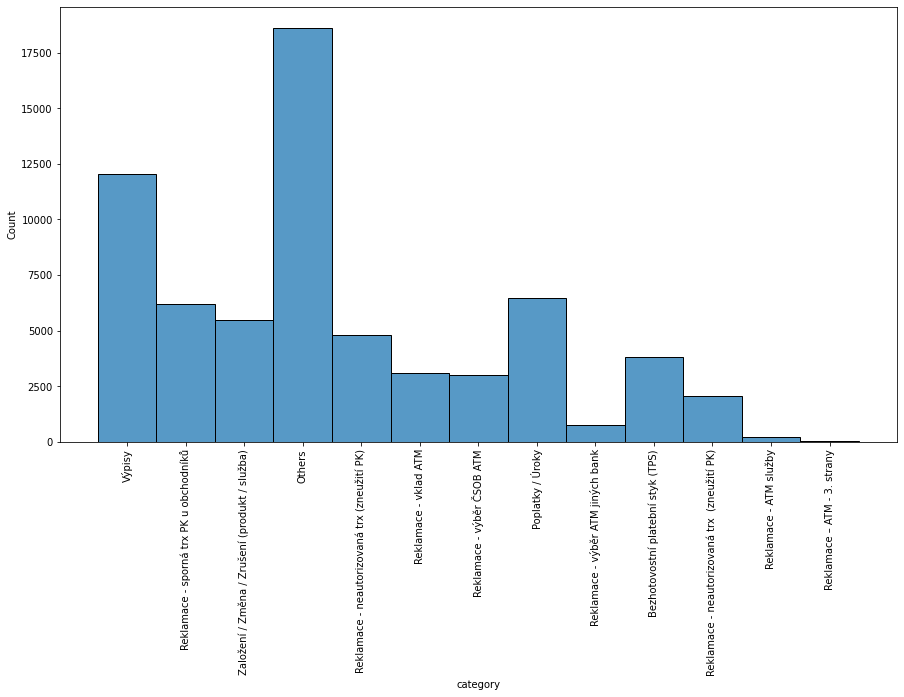

In [84]:
plt.figure(figsize = (15,8))
ax = sns.histplot(sample_df[label_column]);#.value_counts().plot(kind='bar');
plt.xticks(rotation = 90);


In [85]:
df = sample_df

In [18]:
def reduce_label(label):
    split_label = label.split('.')
    if len(split_label) >= 1:
        return '.'.join(split_label[:1])

df['label_reduced'] = df[label_column].map(reduce_label)

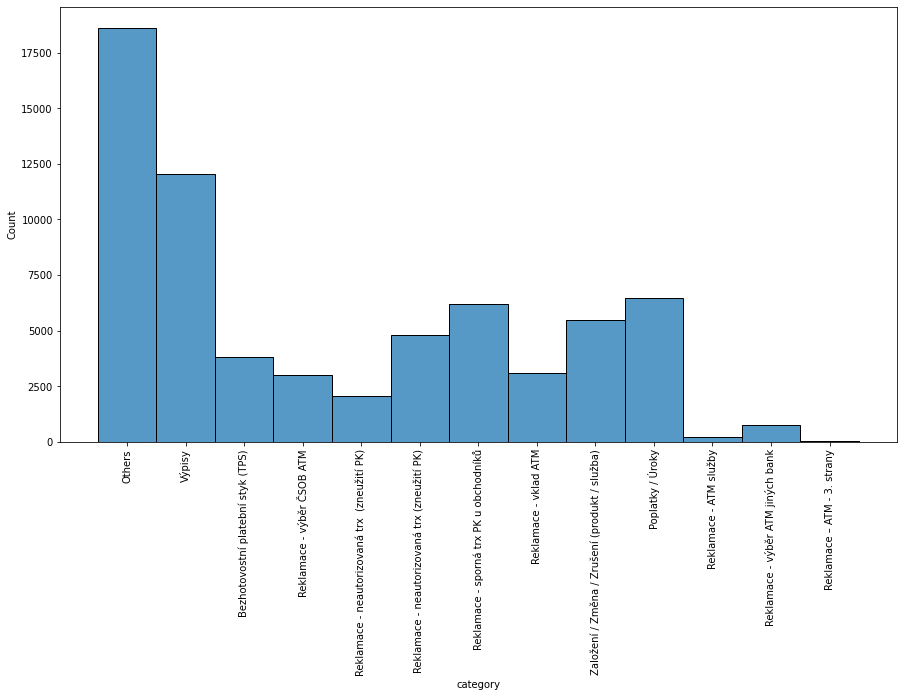

In [19]:
plt.figure(figsize = (15,8))
ax = sns.histplot(df['label_reduced']);#.value_counts().plot(kind='bar');
plt.xticks(rotation = 90);


## Split datasets

Lengths:   dataset_type  lengths
0        train    46602
1          val     9986
2         test     9987


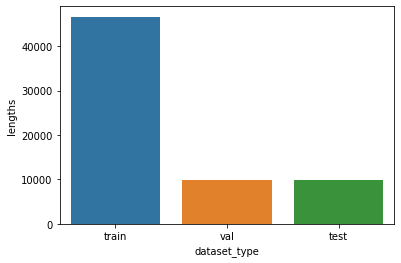

In [86]:
X_train, X_test = train_test_split(
    df,
    test_size=0.3,
    shuffle=True
)

X_val, X_test = train_test_split(
    X_test,
    test_size=0.5,
    shuffle=True
)


lengths_df = pd.DataFrame.from_dict({
    'train': [len(X_train)],
    'val': [len(X_val)],
    'test': [len(X_test)]
})
lengths_df = lengths_df.transpose().reset_index()
lengths_df.columns = ['dataset_type', 'lengths']

print(f'Lengths: {lengths_df}')

sns.barplot(x='dataset_type', y='lengths', data=lengths_df);

In [87]:
X_train[label_column].unique()

array(['Reklamace - sporná trx PK u obchodníků',
       'Založení / Změna / Zrušení (produkt / služba)', 'Výpisy',
       'Reklamace - vklad ATM', 'Others',
       'Reklamace - neautorizovaná trx  (zneužití PK)',
       'Poplatky / Úroky', 'Bezhotovostní platební styk (TPS)',
       'Reklamace - výběr ČSOB ATM', 'Reklamace - ATM služby',
       'Reklamace - neautorizovaná trx (zneužití PK)',
       'Reklamace - výběr ATM jiných bank', 'Reklamace – ATM - 3. strany'],
      dtype=object)

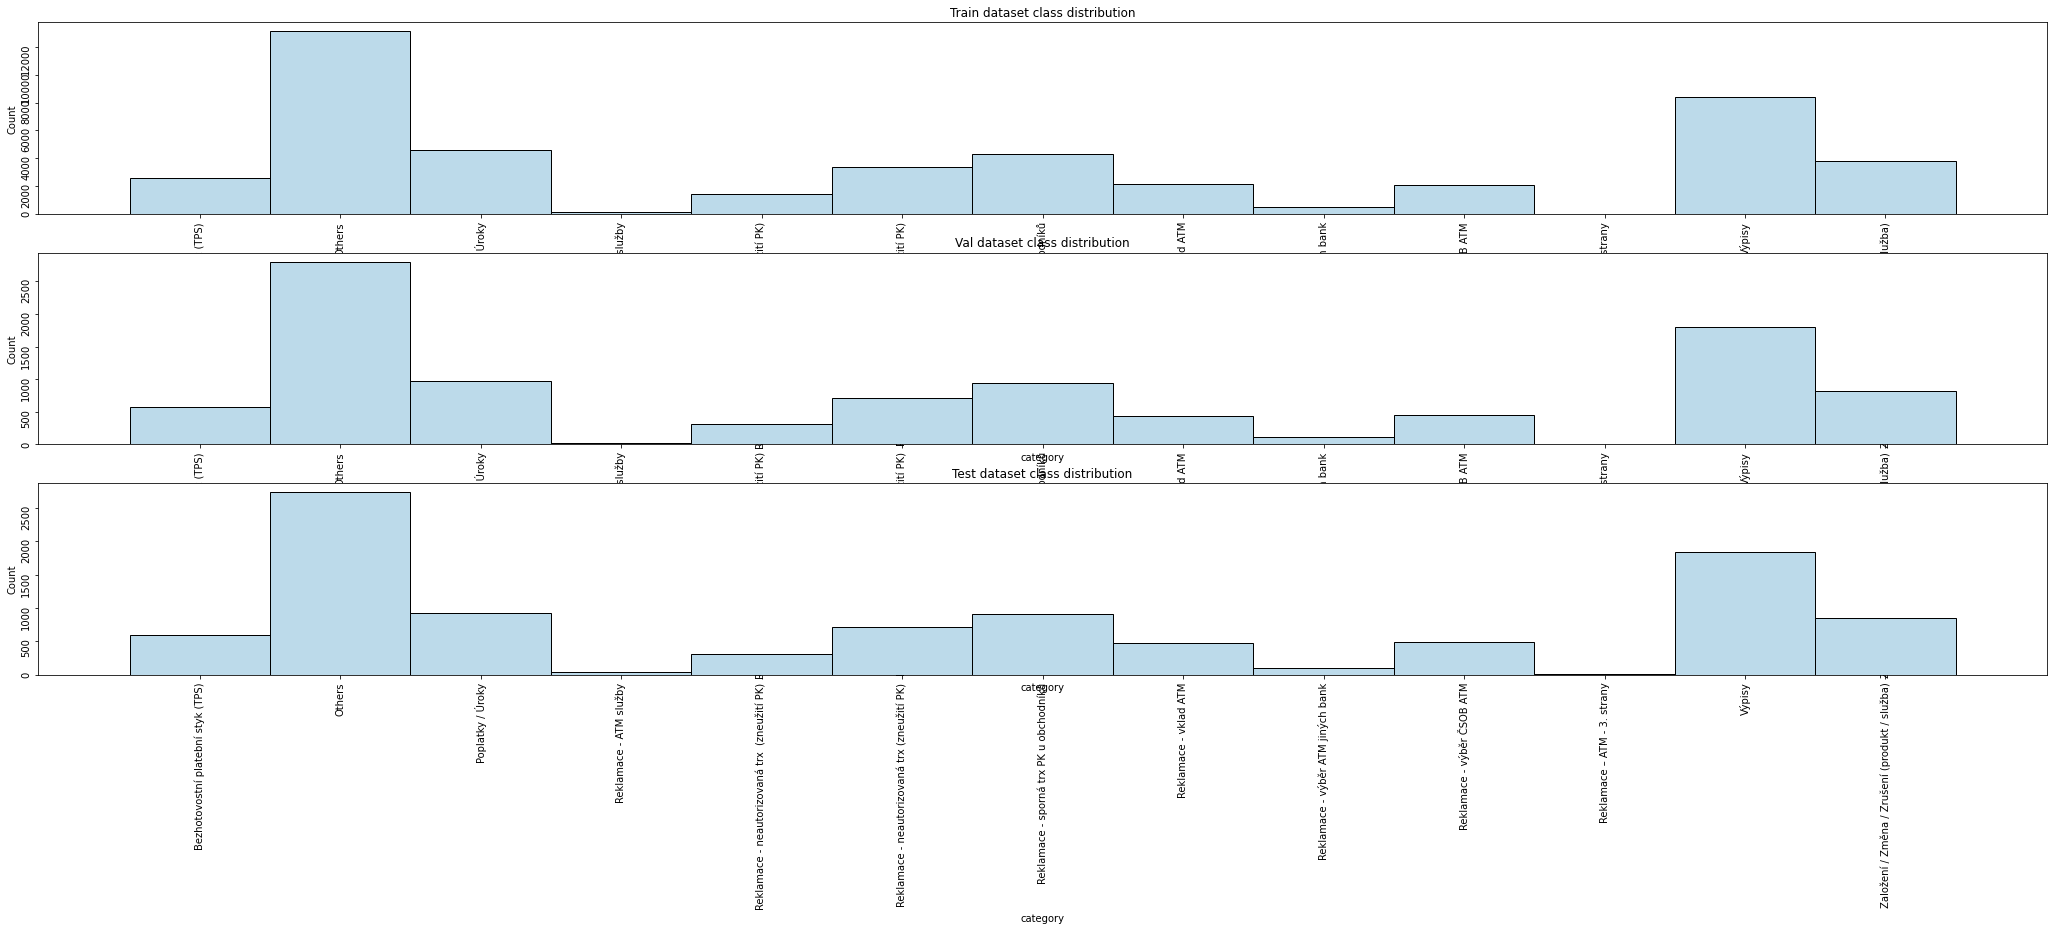

In [93]:
label_column = 'category'

unique_values = sorted(X_train[label_column].unique())

X_train[label_column] = pd.Categorical(X_train[label_column], unique_values)
X_val[label_column] = pd.Categorical(X_val[label_column], unique_values)
X_test[label_column] = pd.Categorical(X_test[label_column], unique_values)

sns.set_palette("Paired")
f, axs = plt.subplots(3, 1, figsize=(36, 12), gridspec_kw=dict(height_ratios=[12, 12, 12]))
sns.histplot(data=X_train[label_column], ax=axs[0])
axs[0].set_title('Train dataset class distribution')
sns.histplot(data=X_val[label_column], ax=axs[1])
axs[1].set_title('Val dataset class distribution')
sns.histplot(data=X_test[label_column], ax=axs[2])
axs[2].set_title('Test dataset class distribution')

axs[0].tick_params(rotation=90)
axs[1].tick_params(rotation=90)
axs[2].tick_params(rotation=90)


#f.tight_layout()


# X_train['airline_sentiment'].value_counts().plot(kind='bar');

In [94]:
X_train = X_train[[label_column, text_column]].reset_index(drop=True)
X_val = X_val[[label_column, text_column]].reset_index(drop=True)
X_test = X_test[[label_column, text_column]].reset_index(drop=True)

save_path = dataset_csv_path.parent


X_train.to_csv(save_path /'train.csv', header=True, index=False)
X_val.to_csv(save_path / 'val.csv', header=True, index=False)
X_test.to_csv(save_path / 'test.csv', header=True, index=False)

In [95]:
X_test

,category,text
0,Bezhotovostní platební styk (TPS),"Dobrý den, klientka zakládala TP na Poště na o..."
1,Výpisy,Klientka reklamuje nedodání výpisu za měsíc ún...
2,Bezhotovostní platební styk (TPS),100288486 - potvrzení platby
3,Výpisy,"Prosím o zaslání výpisů za Leden, duben - pros..."
4,Výpisy,281130759 Klient žádá duplikáty výpisů za obdo...
...,...,...
9982,Výpisy,Klientka měnila účet na Poštovní 9.4.2018 na Č...
9983,Reklamace - neautorizovaná trx (zneužití PK),"Klient prohlašuje, že výše uvedené transakce v..."
9984,Výpisy,"Výpisy 1/2019, 1/2018-7/2018, 10-12/2018"
9985,Poplatky / Úroky,"Dovoluji si zdvořile požádat o informaci, proč..."
